<a href="https://colab.research.google.com/github/abhikr1302/ML_Capstone_Yes_Bank_Stock_closing_Prediction/blob/main/ML_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
Problem Statement - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# 1.Importing Libraries and dataset




In [56]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/YesBank_StockPrices.csv')  #reading the csv file

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# 2.Data Study

In [5]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
df.shape

(185, 5)

In [7]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


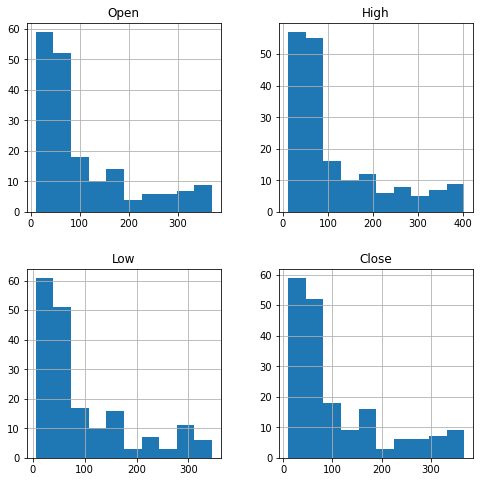

In [9]:
df.hist(figsize=(8,8))# to see the distribution of values
plt.show()

# 3.Data Manipulation

## 3.1 Finding Null Values

In [10]:
#To get the percentage of null values each column wise
nullvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) 
nullvalues_percentage

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

In [11]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


# 4.EDA AND DATA VISUALIZATION

## 4.1 Year-Wise Study Open and Close

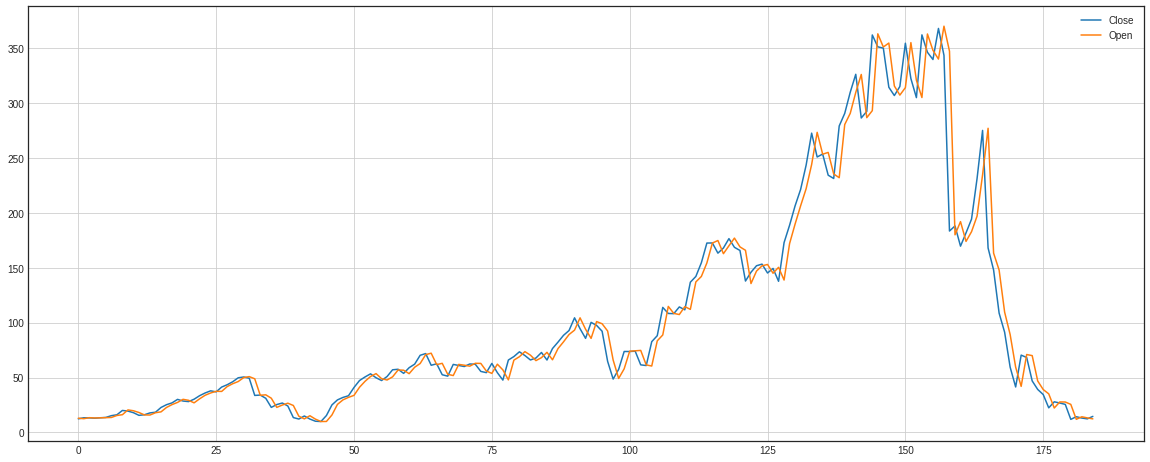

In [63]:
plt.figure(figsize=(20,8))
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.legend(['Close','Open'])
plt.grid()

## 4.2 Year-Wise Study High and Low

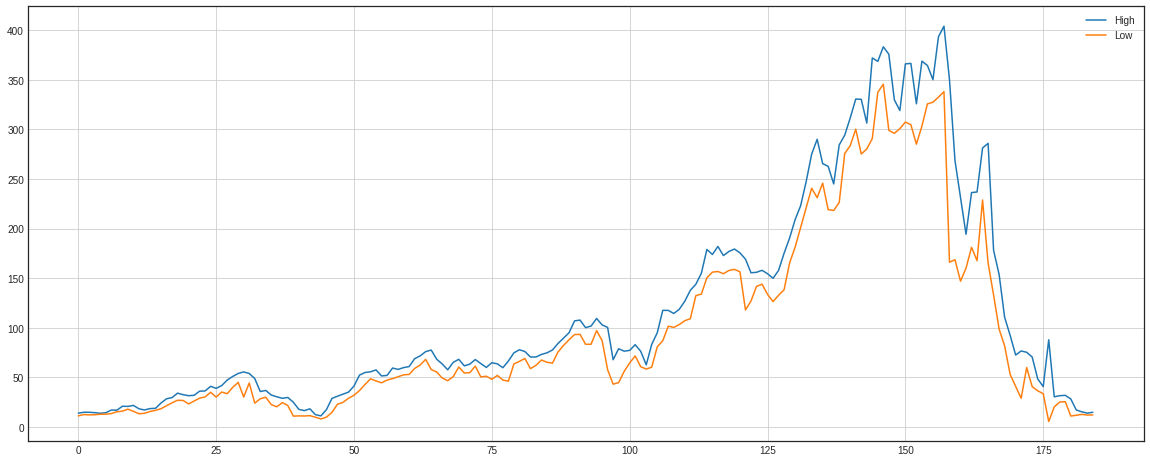

In [64]:
plt.figure(figsize=(20,8))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.grid()

## 4.3 Data Distribution and mean and median of every variables independently

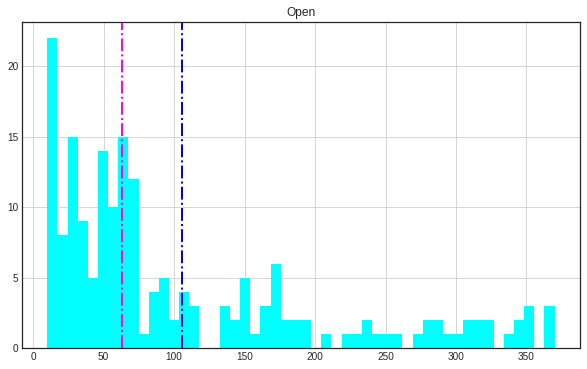

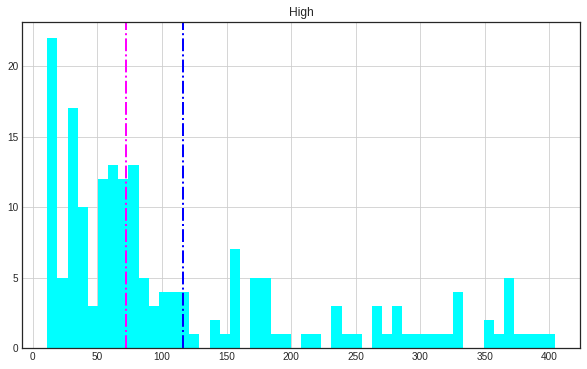

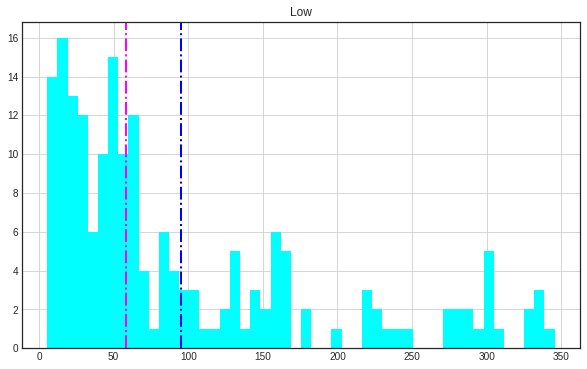

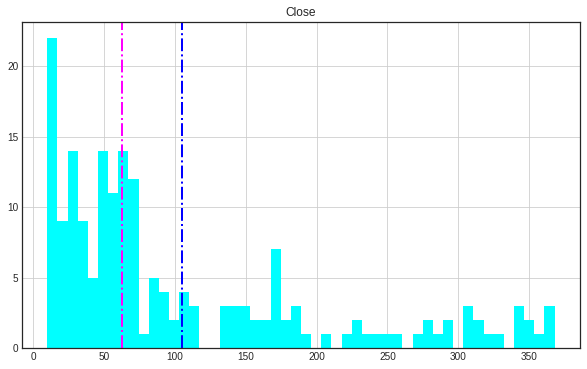

In [65]:
for i in num_cols[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  features = df[i]
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'cyan')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  ax.set_title(i)

## 4.4 Independent Variable Study

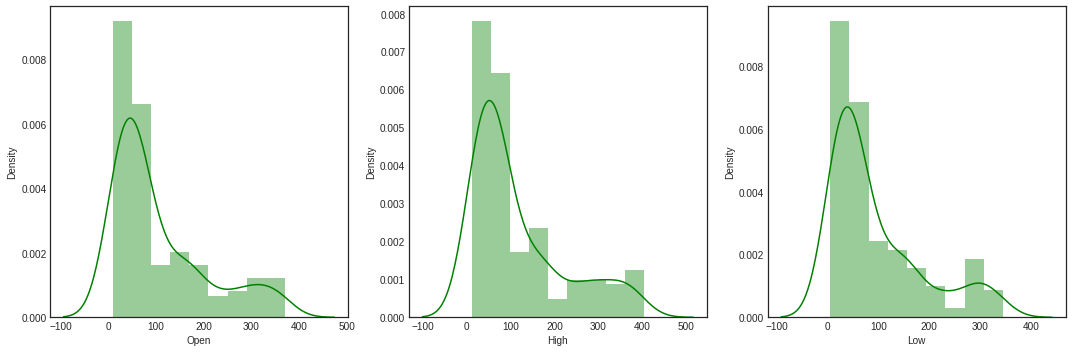

In [66]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(df['Open'], color='g', ax=axs[0])
sns.distplot(df['High'], color='g', ax=axs[1])
sns.distplot(df['Low'], color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

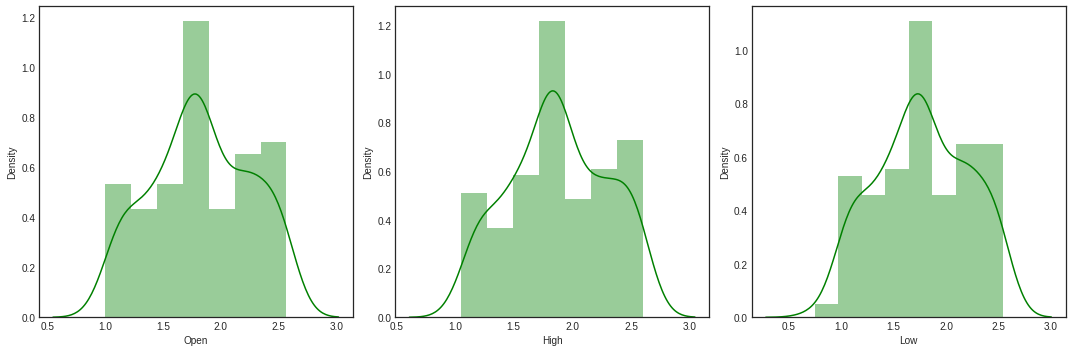

In [67]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(np.log10(df['Open']), color='g', ax=axs[0])
sns.distplot(np.log10(df['High']), color='g', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

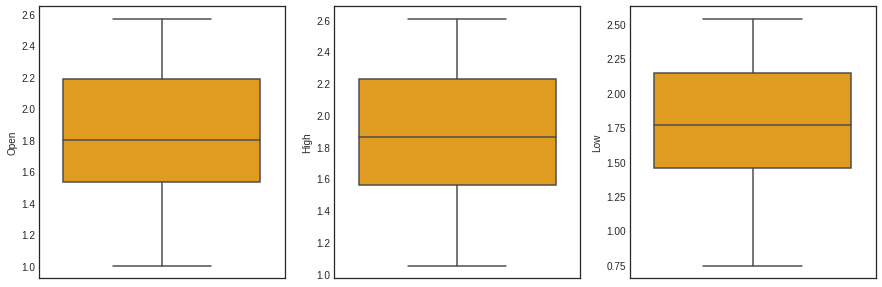

In [68]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig = sns.boxplot(y=np.log10(df["Open"]), color="orange",ax=axes[0])
fig = sns.boxplot(y=np.log10(df["High"]), color="orange",ax=axes[1])
fig = sns.boxplot(y=np.log10(df["Low"]), color="orange",ax=axes[2])

## 4.5 Dependent Variables Study and Normalization

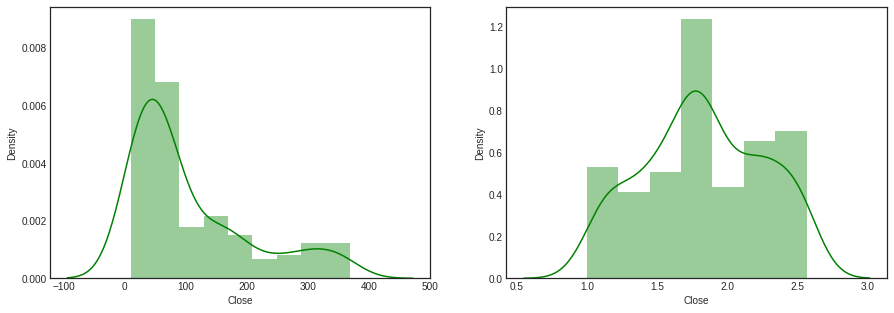

In [69]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(df['Close'], color='g', ax=axs[0])
sns.distplot(np.log10(df['Close']), color='g', ax=axs[1])

## 4.6 Heatmap

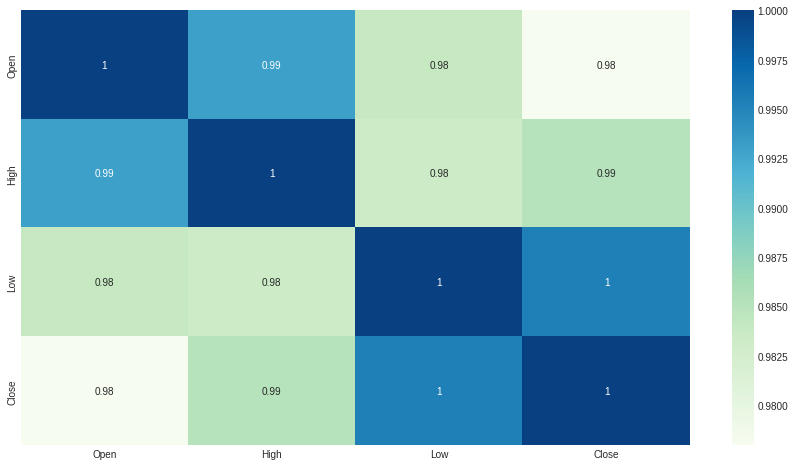

In [70]:
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'GnBu')

## 4.7 Co-relation between Independent and Dependent variables

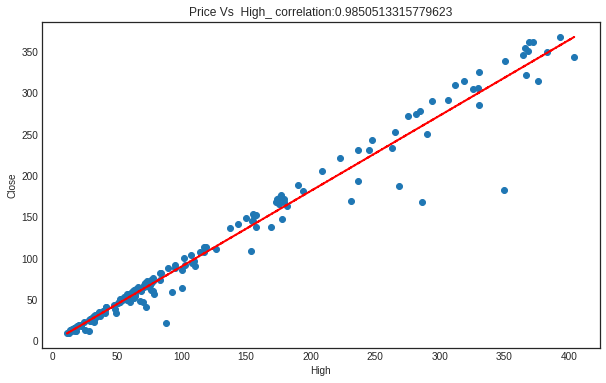

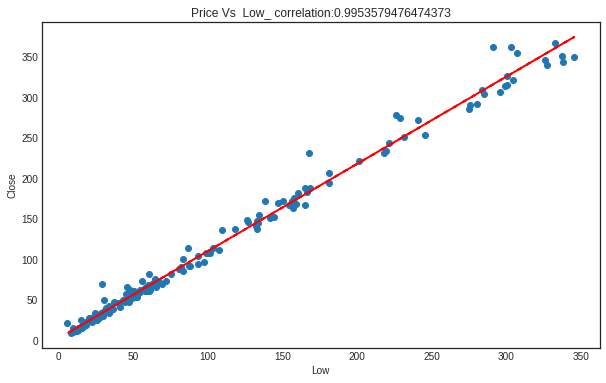

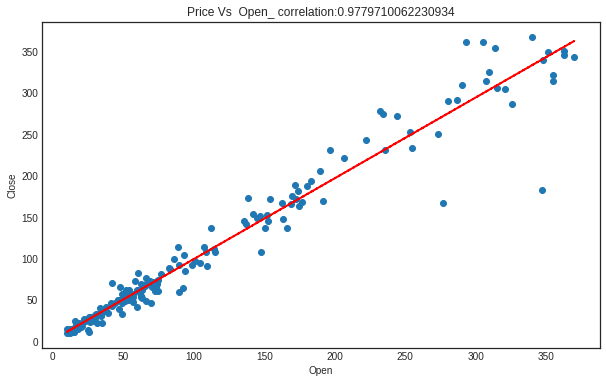

In [71]:
for col in indep_var[:-1]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()
#corelation values are different when we do outliers and then normalization than when we only do normalization

##**Data Modelling**

**Normalisation**

In [145]:
# Defining X to the normalized features except Date and Close
X = df.drop(columns=['Close','Date']).apply(zscore)

# Defining y to the normalized feature Close
y = np.log10(df['Close'])

**Train_test Split**

In [146]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
X_train[0:10]

,Open,High,Low
113,0.370528,0.366782,0.429274
8,-0.905987,-0.897295,-0.867601
96,-0.133263,-0.148090,-0.409331
170,-0.466893,-0.410713,-0.593562
45,-0.968454,-0.929734,-0.934434
98,-0.571343,-0.350456,-0.551241
56,-0.585540,-0.603931,-0.523761
24,-0.705403,-0.707849,-0.658746
30,-0.563332,-0.570927,-0.711290
180,-0.810664,-0.827986,-0.921683


In [148]:
X_test[0:10]

,Open,High,Low
33,-0.726496,-0.757261,-0.730306
125,0.481265,0.362256,0.426086
173,-0.360416,-0.430044,-0.596310
112,0.320027,0.262205,0.412126
61,-0.467907,-0.445320,-0.395040
18,-0.792411,-0.772726,-0.746905
137,1.316861,1.215473,1.355378
7,-0.913085,-0.934826,-0.874416
5,-0.933468,-0.958684,-0.900797
162,0.783965,1.133433,0.947562


In [149]:
#data transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**LINEAR REGRESSION**

In [150]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8090973296947443

In [151]:
reg.intercept_

1.4422348210541465

In [152]:
reg.coef_

array([-0.47291603,  1.04060933,  0.87034372])

**Prediction**

In [158]:
#predictions
y_pred = reg.predict(X_test)
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

**Evaluation Metrics**

In [159]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03197645985998172
RMSE : 0.17881962940343468
R2 : 0.828344109265258
Adjusted R2 :  0.8127390282893724


In [160]:
#empty data frame creation for evaluation metrics for each regression model into this data frame to compare at the end.
i=0
metric_df=pd.DataFrame()
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Linear regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1

**Visualisation**

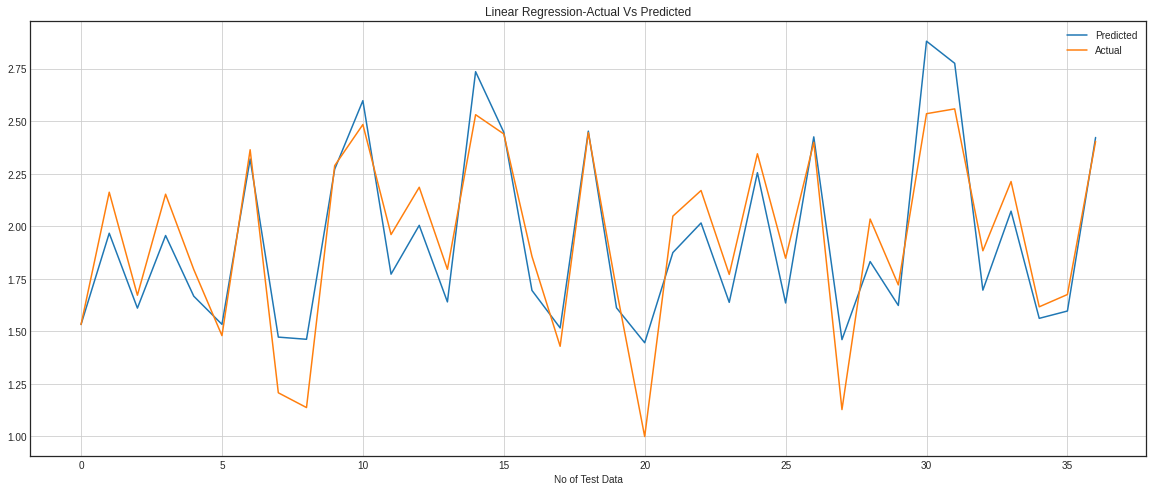

In [161]:
#actual-predicted values plot
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title('Linear Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

##**RIDGE REGRESSION**

In [131]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.8078226634859755

**Prediction**

In [172]:
#Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

**Evaluation**

In [174]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.031874313243139336
RMSE : 0.17853378739930248
R2 : 0.828892452283103
Adjusted R2 :  0.813337220672476


**Cross Validation**

In [183]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


In [184]:
#fitting data
ridge  = Ridge(alpha=1)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.804128634457082

In [185]:
#Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

**Evaluation after Cross Validation**

In [186]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03156659232972407
RMSE : 0.17766989708367614
R2 : 0.8305443583327815
Adjusted R2 :  0.815139299999398


In [187]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**Visualisation**

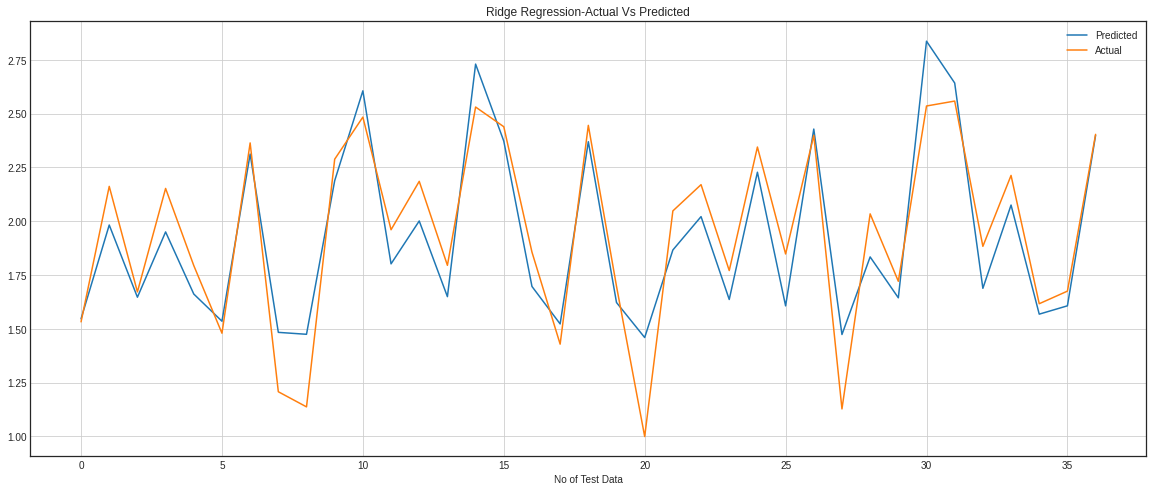

In [188]:
#actual-predicted values plot
plt.figure(figsize=(20,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.title('Ridge Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.grid()
plt.show()